# 01. 데이터 파악하기

In [1]:
import pandas as pd

# 집 값 데이터를 불러오기
df = pd.read_csv('house_train.csv')

In [2]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.dtypes # 정수형 실수형 오브젝트형 여러 유형이 있는 것을 확인 가능

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# 02. 결측치, 카테고리 변수 처리하기

In [4]:
# 결측치 있는지 확인
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [6]:
# 데이터 전처리 카테고리형 변수를 0과 1로 이루어진 변수로 교체
df = pd.get_dummies(df)

In [7]:
# 결측치 채워주기
df = df.fillna(df.mean())

In [8]:
df # 전체 열이 81개에서 290개로 늘었다.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


# 03. 속성별 관련도 추출하기

In [9]:
# 상관분석을 통해 주택 가격 예측에 중요한 속성 찾기

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

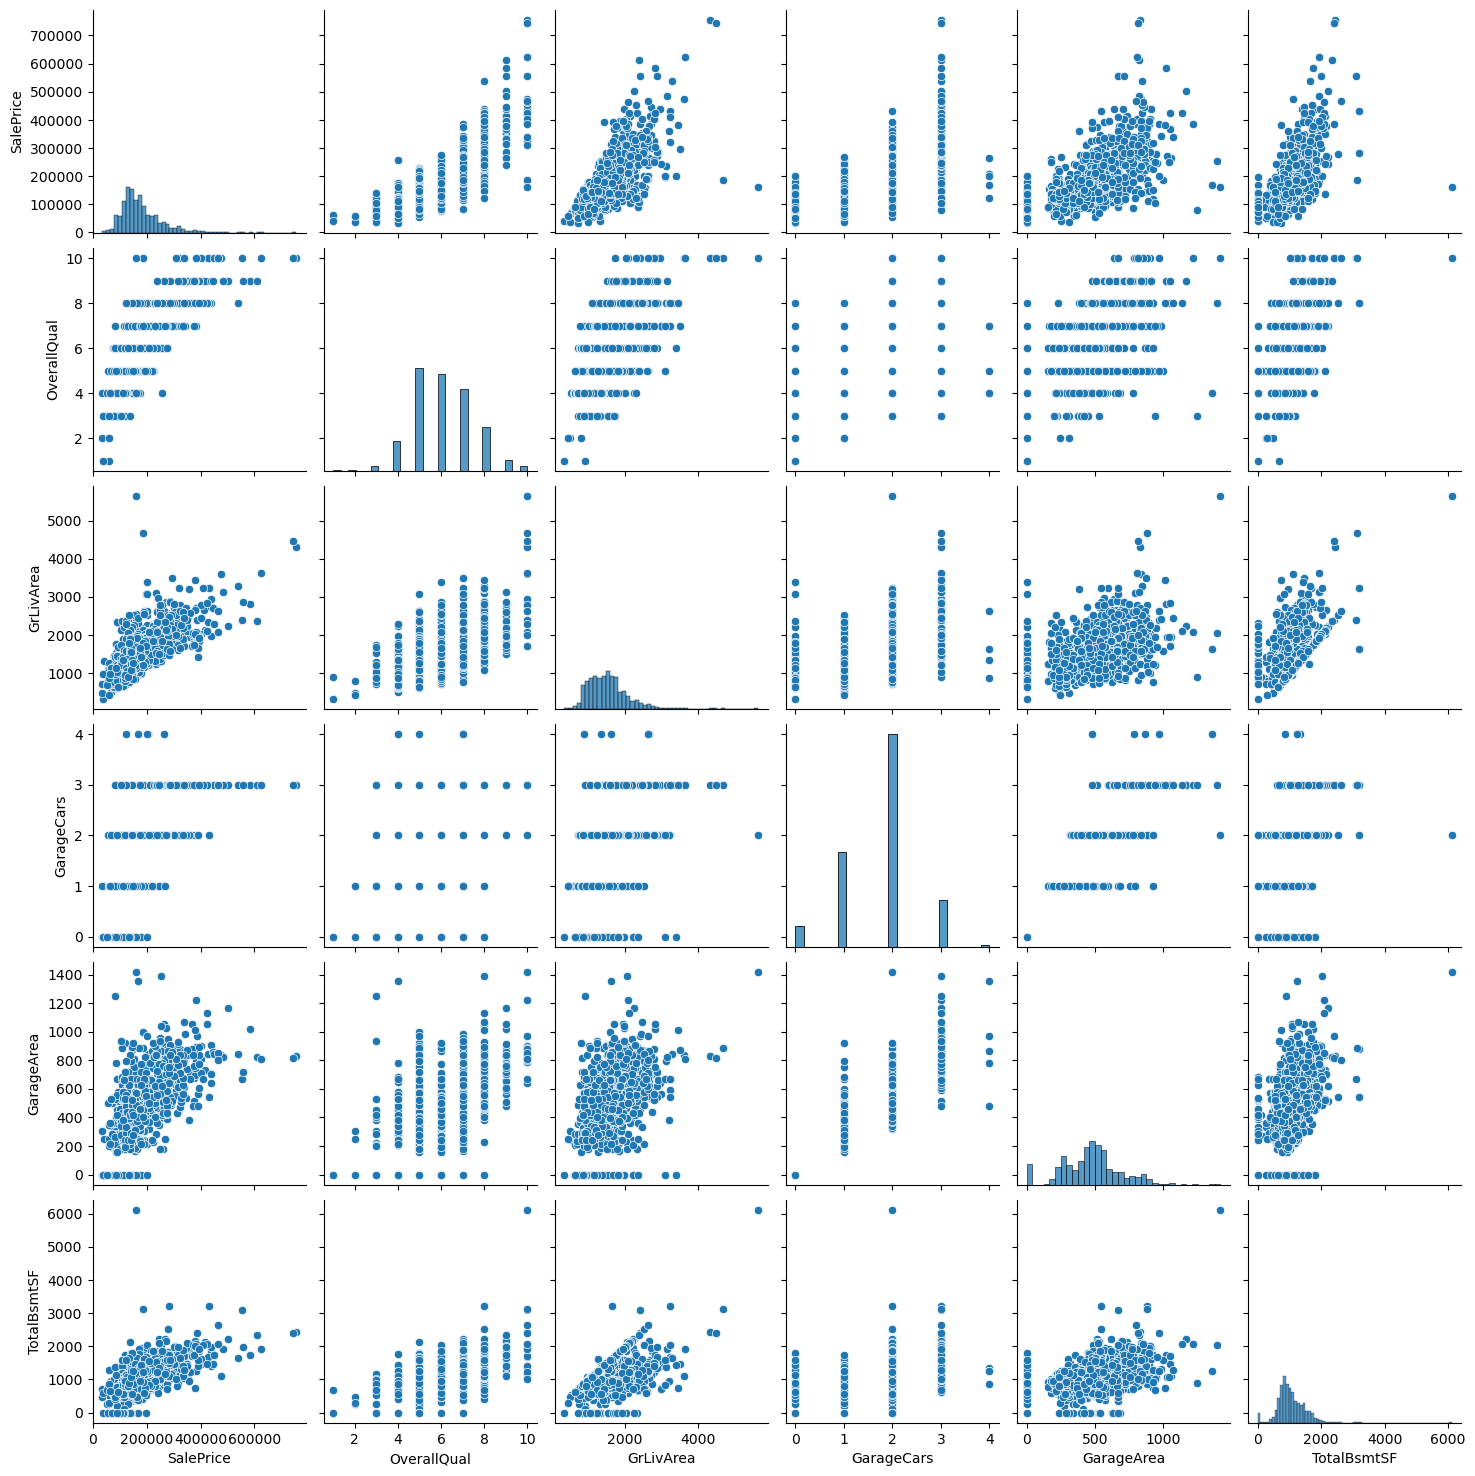

In [12]:
# 추출된 속성들과 집값의 관련도 시각적으로 확인
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF']
sns.pairplot(df[cols])
plt.show()

# 04. 주택 가격 예측 모델

In [17]:
# 중요 속성 이용해 학습셋과 테스트셋 만들기
from sklearn.model_selection import train_test_split

cols_train = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [19]:
# 모델 구조 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1681 (6.57 KB)
Trainable params: 1681 (6.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# 모델 컴파일 선형 회귀라서 mean_squared_error mse
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# 최적의 모델 찾고 저장
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = 'data/model/house.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000,
                   batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 2s 15ms/step - loss: 20789041152.0000 - val_loss: 10091933696.0000
Epoch 2/2000
28/28 [==============================] - 0s 5ms/step - loss: 3939211520.0000 - val_loss: 32666266.0000


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 76209336.0000 - val_loss: 14292100.0000
Epoch 4/2000
28/28 [==============================] - 0s 5ms/step - loss: 3528031.5000 - val_loss: 1738321.0000
Epoch 5/2000
28/28 [==============================] - 0s 5ms/step - loss: 405572.5000 - val_loss: 190548.2969
Epoch 6/2000
28/28 [==============================] - 0s 5ms/step - loss: 146156.5625 - val_loss: 133205.7812
Epoch 7/2000
28/28 [==============================] - 0s 5ms/step - loss: 126105.4922 - val_loss: 123201.6875
Epoch 8/2000
28/28 [==============================] - 0s 5ms/step - loss: 124896.3828 - val_loss: 124156.8906
Epoch 9/2000
28/28 [==============================] - 0s 4ms/step - loss: 124510.3984 - val_loss: 122844.3672
Epoch 10/2000
28/28 [==============================] - 0s 5ms/step - loss: 124287.0469 - val_loss: 122837.3125
Epoch 11/2000
28/28 [==============================] - 0s 5ms/step - loss: 124158.6484 - val_loss: 121315.2891
Ep

Epoch 77/2000
28/28 [==============================] - 0s 6ms/step - loss: 104789.6094 - val_loss: 108646.4609
Epoch 78/2000
28/28 [==============================] - 0s 4ms/step - loss: 99354.9609 - val_loss: 107449.0703
Epoch 79/2000
28/28 [==============================] - 0s 5ms/step - loss: 107818.3750 - val_loss: 100518.4844
Epoch 80/2000
28/28 [==============================] - 0s 7ms/step - loss: 97945.2812 - val_loss: 99480.4141
Epoch 81/2000
28/28 [==============================] - 0s 4ms/step - loss: 98800.2656 - val_loss: 101750.1875
Epoch 82/2000
28/28 [==============================] - 0s 5ms/step - loss: 98370.9609 - val_loss: 97992.2578
Epoch 83/2000
28/28 [==============================] - 0s 6ms/step - loss: 101811.5859 - val_loss: 97275.9062
Epoch 84/2000
28/28 [==============================] - 0s 3ms/step - loss: 94782.7188 - val_loss: 97433.5859
Epoch 85/2000
28/28 [==============================] - 0s 5ms/step - loss: 96466.7422 - val_loss: 96593.9922
Epoch 86/200

28/28 [==============================] - 0s 4ms/step - loss: 51039.4688 - val_loss: 65905.0469
Epoch 152/2000
28/28 [==============================] - 0s 4ms/step - loss: 58437.5703 - val_loss: 59353.5625
Epoch 153/2000
28/28 [==============================] - 0s 3ms/step - loss: 60994.0977 - val_loss: 74997.0781
Epoch 154/2000
28/28 [==============================] - 0s 4ms/step - loss: 64528.4961 - val_loss: 63470.1562
Epoch 155/2000
28/28 [==============================] - 0s 5ms/step - loss: 46857.2148 - val_loss: 55635.3867
Epoch 156/2000
28/28 [==============================] - 0s 5ms/step - loss: 49624.5195 - val_loss: 52344.8789
Epoch 157/2000
28/28 [==============================] - 0s 4ms/step - loss: 51229.3750 - val_loss: 57536.4531
Epoch 158/2000
28/28 [==============================] - 0s 3ms/step - loss: 48905.5391 - val_loss: 54121.7891
Epoch 159/2000
28/28 [==============================] - 0s 3ms/step - loss: 52999.5352 - val_loss: 61634.1914
Epoch 160/2000
28/28 [===

28/28 [==============================] - 0s 3ms/step - loss: 21181.1113 - val_loss: 57180.2773
Epoch 226/2000
28/28 [==============================] - 0s 2ms/step - loss: 21096.4062 - val_loss: 20307.6914
Epoch 227/2000
28/28 [==============================] - 0s 3ms/step - loss: 12080.2275 - val_loss: 15436.3115
Epoch 228/2000
28/28 [==============================] - 0s 4ms/step - loss: 14559.0625 - val_loss: 15374.2520
Epoch 229/2000
28/28 [==============================] - 0s 3ms/step - loss: 15079.8311 - val_loss: 15040.6299
Epoch 230/2000
28/28 [==============================] - 0s 2ms/step - loss: 11645.5889 - val_loss: 15277.3633
Epoch 231/2000
28/28 [==============================] - 0s 2ms/step - loss: 12064.5137 - val_loss: 15746.5908
Epoch 232/2000
28/28 [==============================] - 0s 3ms/step - loss: 17836.5957 - val_loss: 14286.2822
Epoch 233/2000
28/28 [==============================] - 0s 3ms/step - loss: 10556.4922 - val_loss: 18042.0625
Epoch 234/2000
28/28 [===

28/28 [==============================] - 0s 3ms/step - loss: 8962.7363 - val_loss: 1643.6451
Epoch 301/2000
28/28 [==============================] - 0s 4ms/step - loss: 8937.4092 - val_loss: 5978.3711
Epoch 302/2000
28/28 [==============================] - 0s 6ms/step - loss: 2842.1990 - val_loss: 1405.9393
Epoch 303/2000
28/28 [==============================] - 0s 5ms/step - loss: 2184.8176 - val_loss: 1736.7588
Epoch 304/2000
28/28 [==============================] - 0s 4ms/step - loss: 2468.4702 - val_loss: 1288.2909
Epoch 305/2000
28/28 [==============================] - 0s 4ms/step - loss: 1743.9136 - val_loss: 1123.5382
Epoch 306/2000
28/28 [==============================] - 0s 5ms/step - loss: 1268.1532 - val_loss: 1625.0221
Epoch 307/2000
28/28 [==============================] - 0s 5ms/step - loss: 1117.0588 - val_loss: 1149.4480
Epoch 308/2000
28/28 [==============================] - 0s 6ms/step - loss: 6103.8726 - val_loss: 22158.6621
Epoch 309/2000
28/28 [====================

28/28 [==============================] - 0s 5ms/step - loss: 3200.1357 - val_loss: 118.1937
Epoch 377/2000
28/28 [==============================] - 0s 2ms/step - loss: 214.1197 - val_loss: 510.9318
Epoch 378/2000
28/28 [==============================] - 0s 3ms/step - loss: 1202.5946 - val_loss: 99.1288
Epoch 379/2000
28/28 [==============================] - 0s 3ms/step - loss: 1089.1060 - val_loss: 241.5268
Epoch 380/2000
28/28 [==============================] - 0s 3ms/step - loss: 3280.1980 - val_loss: 8216.5439
Epoch 381/2000
28/28 [==============================] - 0s 3ms/step - loss: 11247.1104 - val_loss: 2374.0278
Epoch 382/2000
28/28 [==============================] - 0s 6ms/step - loss: 986.7047 - val_loss: 78.5712
Epoch 383/2000
28/28 [==============================] - 0s 3ms/step - loss: 105.1168 - val_loss: 113.8113
Epoch 384/2000
28/28 [==============================] - 0s 2ms/step - loss: 159.5179 - val_loss: 353.3429
Epoch 385/2000
28/28 [==============================] -

# 전체 코드 실행

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 집 값 데이터 불러오기
df = pd.read_csv('house_train.csv')

# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.
df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체해 채워 넣기
df = df.fillna(df.mean())

# 데이터 사이의 상관관계를 저장
df_corr = df.corr()

# 집 값과 관련이 큰 것부터 순서대로 저장
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

# 집 값을 제외한 나머지 열을 저장
cols_train = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF']
X_train_pre = df[cols_train]

# 집 값을 저장
y = df['SalePrice'].values

# 전체의 80%를 학습셋으로 20%를 테스트셋으로 저장
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행
model.compile(optimizer='adam', loss='mean_squared_error')

# 20번 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath = 'data/model/house.hdf5'

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분 전체의 20%를 검증셋으로 설정
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000,
                   batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                70        
                                                                 
 dense_17 (Dense)            (None, 30)                330       
                                                                 
 dense_18 (Dense)            (None, 40)                1240      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1681 (6.57 KB)
Trainable params: 1681 (6.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - 1s 11ms/step - loss: 32797745152.0000 - val_loss: 24993431552.0000
Epoch 2/2000
28/28 [=============

C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 5ms/step - loss: 1497985536.0000 - val_loss: 486455.4062
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 27218242.0000 - val_loss: 63685.6250
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 1440502.2500 - val_loss: 122038.6172
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 134357.7656 - val_loss: 35078.7188
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 19534.8906 - val_loss: 15189.0068
Epoch 8/2000
28/28 [==============================] - 0s 3ms/step - loss: 11729.7383 - val_loss: 12283.4561
Epoch 9/2000
28/28 [==============================] - 0s 3ms/step - loss: 11463.9756 - val_loss: 12293.1621
Epoch 10/2000
28/28 [==============================] - 0s 3ms/step - loss: 11441.4688 - val_loss: 12620.4326
Epoch 11/2000
28/28 [==============================] - 0s 2ms/step - loss: 11408.9570 - val_loss: 12350.2617
Epoch 12/2000
28/28 [=====

28/28 [==============================] - 0s 2ms/step - loss: 10667.1211 - val_loss: 11286.1270
Epoch 79/2000
28/28 [==============================] - 0s 2ms/step - loss: 10378.6240 - val_loss: 11308.3389
Epoch 80/2000
28/28 [==============================] - 0s 3ms/step - loss: 10553.3711 - val_loss: 12448.6738
Epoch 81/2000
28/28 [==============================] - 0s 4ms/step - loss: 10721.9238 - val_loss: 11887.1348
Epoch 82/2000
28/28 [==============================] - 0s 3ms/step - loss: 10561.6396 - val_loss: 11049.1445
Epoch 83/2000
28/28 [==============================] - 0s 2ms/step - loss: 10453.3359 - val_loss: 11468.9629
Epoch 84/2000
28/28 [==============================] - 0s 3ms/step - loss: 10275.8916 - val_loss: 10937.7021
Epoch 85/2000
28/28 [==============================] - 0s 4ms/step - loss: 10296.3643 - val_loss: 10926.7324
Epoch 86/2000
28/28 [==============================] - 0s 2ms/step - loss: 10472.6445 - val_loss: 11849.3301
Epoch 87/2000
28/28 [============

28/28 [==============================] - 0s 4ms/step - loss: 8453.6562 - val_loss: 9172.2295
Epoch 154/2000
28/28 [==============================] - 0s 6ms/step - loss: 8436.5127 - val_loss: 7999.6411
Epoch 155/2000
28/28 [==============================] - 0s 5ms/step - loss: 7613.8320 - val_loss: 7844.4521
Epoch 156/2000
28/28 [==============================] - 0s 4ms/step - loss: 7823.6094 - val_loss: 9060.4111
Epoch 157/2000
28/28 [==============================] - 0s 3ms/step - loss: 8023.1660 - val_loss: 8207.8438
Epoch 158/2000
28/28 [==============================] - 0s 3ms/step - loss: 8240.2842 - val_loss: 10908.3164
Epoch 159/2000
28/28 [==============================] - 0s 5ms/step - loss: 7903.1357 - val_loss: 7897.8975
Epoch 160/2000
28/28 [==============================] - 0s 5ms/step - loss: 7359.6582 - val_loss: 7970.7627
Epoch 161/2000
28/28 [==============================] - 0s 4ms/step - loss: 7360.5181 - val_loss: 7745.6963
Epoch 162/2000
28/28 [====================

Epoch 229/2000
28/28 [==============================] - 0s 5ms/step - loss: 3385.2766 - val_loss: 3446.2734
Epoch 230/2000
28/28 [==============================] - 0s 6ms/step - loss: 4022.9524 - val_loss: 3249.9739
Epoch 231/2000
28/28 [==============================] - 0s 3ms/step - loss: 3289.8501 - val_loss: 4171.9067
Epoch 232/2000
28/28 [==============================] - 0s 3ms/step - loss: 3278.6284 - val_loss: 3997.0886
Epoch 233/2000
28/28 [==============================] - 0s 2ms/step - loss: 3506.6465 - val_loss: 3923.2090
Epoch 234/2000
28/28 [==============================] - 0s 4ms/step - loss: 4310.2051 - val_loss: 3130.5500
Epoch 235/2000
28/28 [==============================] - 0s 4ms/step - loss: 3636.0435 - val_loss: 4091.2141
Epoch 236/2000
28/28 [==============================] - 0s 5ms/step - loss: 4975.9541 - val_loss: 5794.8647
Epoch 237/2000
28/28 [==============================] - 0s 4ms/step - loss: 4420.0757 - val_loss: 3999.2568
Epoch 238/2000
28/28 [======

28/28 [==============================] - 0s 2ms/step - loss: 1747.9763 - val_loss: 2734.5913
Epoch 306/2000
28/28 [==============================] - 0s 2ms/step - loss: 992.4788 - val_loss: 3341.2454
Epoch 307/2000
28/28 [==============================] - 0s 3ms/step - loss: 887.2750 - val_loss: 388.5772
Epoch 308/2000
28/28 [==============================] - 0s 3ms/step - loss: 1053.0923 - val_loss: 2020.3268
Epoch 309/2000
28/28 [==============================] - 0s 2ms/step - loss: 981.0284 - val_loss: 614.1613
Epoch 310/2000
28/28 [==============================] - 0s 2ms/step - loss: 3530.0591 - val_loss: 10287.1641
Epoch 311/2000
28/28 [==============================] - 0s 3ms/step - loss: 4616.7842 - val_loss: 1666.8534
Epoch 312/2000
28/28 [==============================] - 0s 2ms/step - loss: 1058.8944 - val_loss: 7026.9150
Epoch 313/2000
28/28 [==============================] - 0s 2ms/step - loss: 85916.0938 - val_loss: 172188.0625
Epoch 314/2000
28/28 [======================

28/28 [==============================] - 0s 5ms/step - loss: 48408.5117 - val_loss: 60448.9727
Epoch 382/2000
28/28 [==============================] - 0s 4ms/step - loss: 10294.8418 - val_loss: 699.9043
Epoch 383/2000
28/28 [==============================] - 0s 4ms/step - loss: 44.6110 - val_loss: 22.1769
Epoch 384/2000
28/28 [==============================] - 0s 3ms/step - loss: 55.0141 - val_loss: 47.8820
Epoch 385/2000
28/28 [==============================] - 0s 2ms/step - loss: 785.2502 - val_loss: 2472.7048
Epoch 386/2000
28/28 [==============================] - 0s 2ms/step - loss: 7909.9131 - val_loss: 7307.1206
Epoch 387/2000
28/28 [==============================] - 0s 3ms/step - loss: 1810.5687 - val_loss: 29.0413
Epoch 388/2000
28/28 [==============================] - 0s 2ms/step - loss: 1778.6953 - val_loss: 4105.0503
Epoch 389/2000
28/28 [==============================] - 0s 3ms/step - loss: 5616.0752 - val_loss: 1792.5673
Epoch 390/2000
28/28 [==============================

In [38]:
# 예측 결과 시각화
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print('실제가격: {:.2f}, 예상가격: {:.2f}'.format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 2ms/step
실제가격: 253000.00, 예상가격: 254346.06
실제가격: 127000.00, 예상가격: 127675.51
실제가격: 360000.00, 예상가격: 361913.28
실제가격: 755000.00, 예상가격: 759010.31
실제가격: 138887.00, 예상가격: 139624.91
실제가격: 165000.00, 예상가격: 165876.53
실제가격: 226700.00, 예상가격: 227905.94
실제가격: 99500.00, 예상가격: 100028.62
실제가격: 337000.00, 예상가격: 338792.91
실제가격: 128000.00, 예상가격: 128681.20
실제가격: 170000.00, 예상가격: 170905.47
실제가격: 130000.00, 예상가격: 130692.23
실제가격: 167900.00, 예상가격: 168793.31
실제가격: 153337.00, 예상가격: 154153.64
실제가격: 91300.00, 예상가격: 91785.66
실제가격: 263000.00, 예상가격: 264398.75
실제가격: 145000.00, 예상가격: 145772.28
실제가격: 137900.00, 예상가격: 138635.02
실제가격: 134000.00, 예상가격: 134713.38
실제가격: 110500.00, 예상가격: 111085.37
실제가격: 318000.00, 예상가격: 319691.41
실제가격: 294000.00, 예상가격: 295562.62
실제가격: 157000.00, 예상가격: 157834.84
실제가격: 165000.00, 예상가격: 165877.38
실제가격: 214900.00, 예상가격: 216042.88


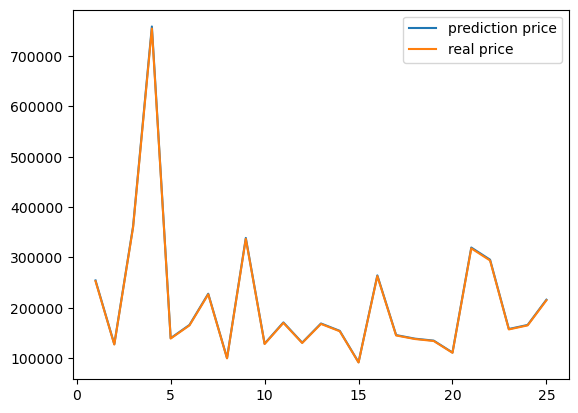

In [39]:
# 그래프를 통해 샘플로 뽑은 25개 값 비교
plt.plot(X_num, pred_prices, label='prediction price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()